# **Budget Cuts and Badges**  
### *Before the Algorithm Earns Its Place*

Jeff “The Eyeball” Mallory used to handle this gig. Real numbers guy. Lived off black coffee and the smell of CSVs. One day he looked too deep into a scatterplot, muttered “the clusters are watching,” and vanished. Union says burnout. I say nerves.

Now it’s my mess.
I don’t read files — I read people. But the brass is broke, Jeff’s gone, and the city’s piling suspects like empty bottles behind a dive bar. So we do what desperate men do: we teach a machine to care.


---
<br><br>

## **Prepping the Case**

Turns out it’s not that different. You train it like a rookie — throw it in the alleys, let it get punched a few times, see if it learns.

I split the archives of the most recent crime scenes three ways:


- **`Train_case_files.csv`** — where the machine earns its badge, one pattern at a time.

- **`Validation_case_files.csv`** —  the internal affairs of this operation. Keeps it from getting cocky.

- **`New_suspects.csv`** — fresh cases. Just raw data and a question: who’s who?


From the **full archive**, we slice off 80%. That’s `Train_case_files.csv`. The other 20%? That’s `Validation_case_files.csv`.

Usually, you’d want a 90/10 split — more data for training, less for checks. But when the evidence is scarce, you adapt. 80/20 fits this case better.

The real test is `New_suspects.csv` That’s when you find out if the prep was worth the cigarette burns.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

df_train = pd.read_csv('./Suspects/Train_case_files.csv')
train_df, val_df = train_test_split(df_train, test_size=0.20, random_state=42, shuffle=True)

train_df.to_csv('Suspects/Train_case_files80.csv', index=False)
val_df.to_csv('Suspects/Validation_case_files20.csv', index=False)

print(f"Training set: {len(train_df)} rows ({len(train_df)/len(df_train)*100:.2f}%)")
print(f"Validation set: {len(val_df)} rows ({len(val_df)/len(df_train)*100:.2f}%)")


Training set: 318 rows (79.90%)
Validation set: 80 rows (20.10%)


---
<br><br>


## **Gathering Our Evidence**

The groundwork’s laid. Time to pop the lid and see what we’re dealing with.

We start with two case files:

- `Train_case_files.csv`
- `New_suspects.csv`

Before we start drawing conclusions, we need to know what shape they’re in. Columns, counts, types — the usual sweep. Let’s take a look.


In [2]:
import pandas as pd

df_train = pd.read_csv('./Suspects/Train_case_files.csv')
df_test = pd.read_csv('./Suspects/New_suspects.csv')

print("\033[1mColumn names:\033[0m")
print(df_train.columns)

print("\033[1m\r\n\r\nTotal entries count:\033[0m")
print(len(df_train))

print("\033[1m\r\n\r\nDescribe dataframe:\033[0m")
print(df_train.describe())

Column names:
Index(['Emotional Volatility', 'Deception Quotient', 'Physical Strength',
       'Authority Resistance', 'Athleticism', 'Sleight of Hand',
       'Hypervigilance', 'Anticipation Ability', 'Reflex Score',
       'Genetic Marker Score', 'Weapon Proficiency', 'Motor Control',
       'Manipulation Tendency', 'Weapon Ownership Index', 'Outdoor Skills',
       'Rejection of Others', 'Social Network Size', 'Reaction Time',
       'Balance', 'Body Mass Index', 'Stress Recovery Score',
       'Evasiveness Score', 'Substance History', 'Flight Risk Score',
       'Multi-tasking Under Stress', 'Interrogation Delay',
       'Empathy Deficiency', 'Dominance Score', 'Outburst Frequency',
       'Possessiveness Indicator', 'suspect'],
      dtype='object')


Total entries count:
398


Describe dataframe:
       Emotional Volatility  Deception Quotient  Physical Strength  \
count            398.000000          398.000000         398.000000   
mean              14.097661           19.11502

Each row’s a suspect, each column a stat — stress, manipulation, leadership, all quantified like it's a video game.

Last column’s the kicker: **"guilty"** if they’re guilty, **"innocent"** if they just had an unlucky face.

---
<br><br>

## **Profiling the Perps**

First step in any case? Get to know your suspects. Not their names — but their tells. The kind of traits they don’t even realize they’re leaking. You size ’em up, one variable at a time...

We paint the scene. **Red for the guilty. Blue for the innocent**. Then we track the burn lines — where the heat builds and where it fades into cold ash.

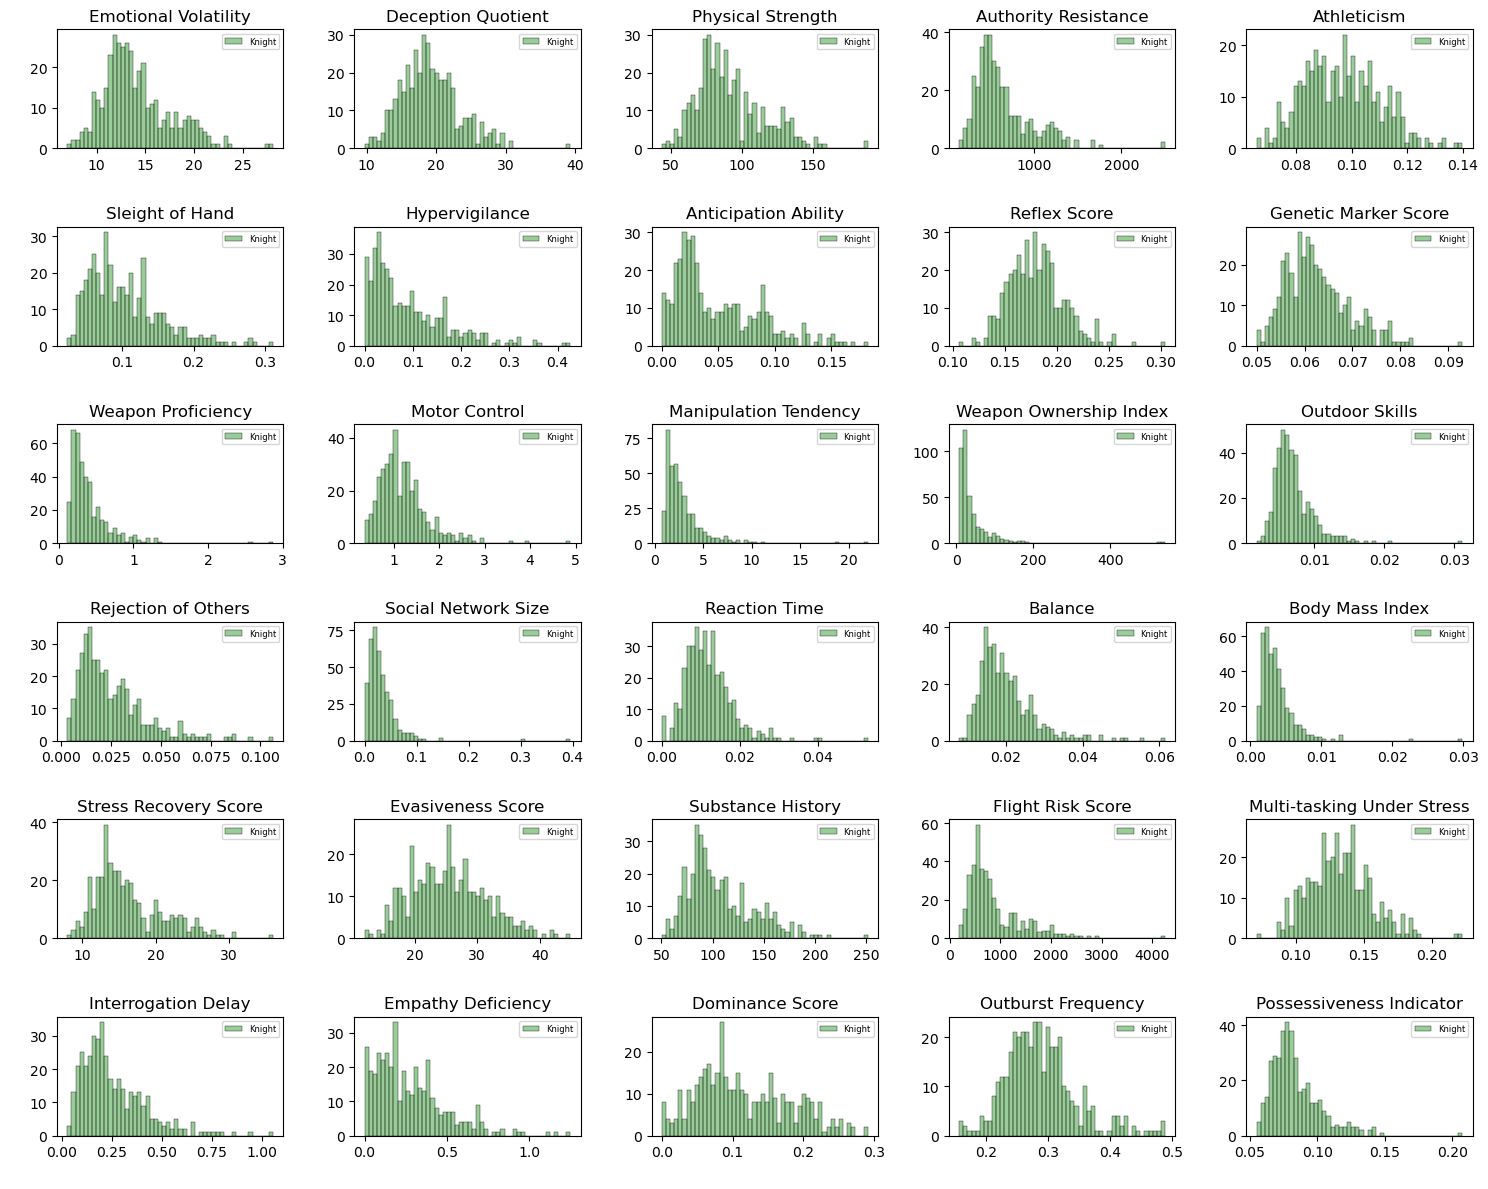

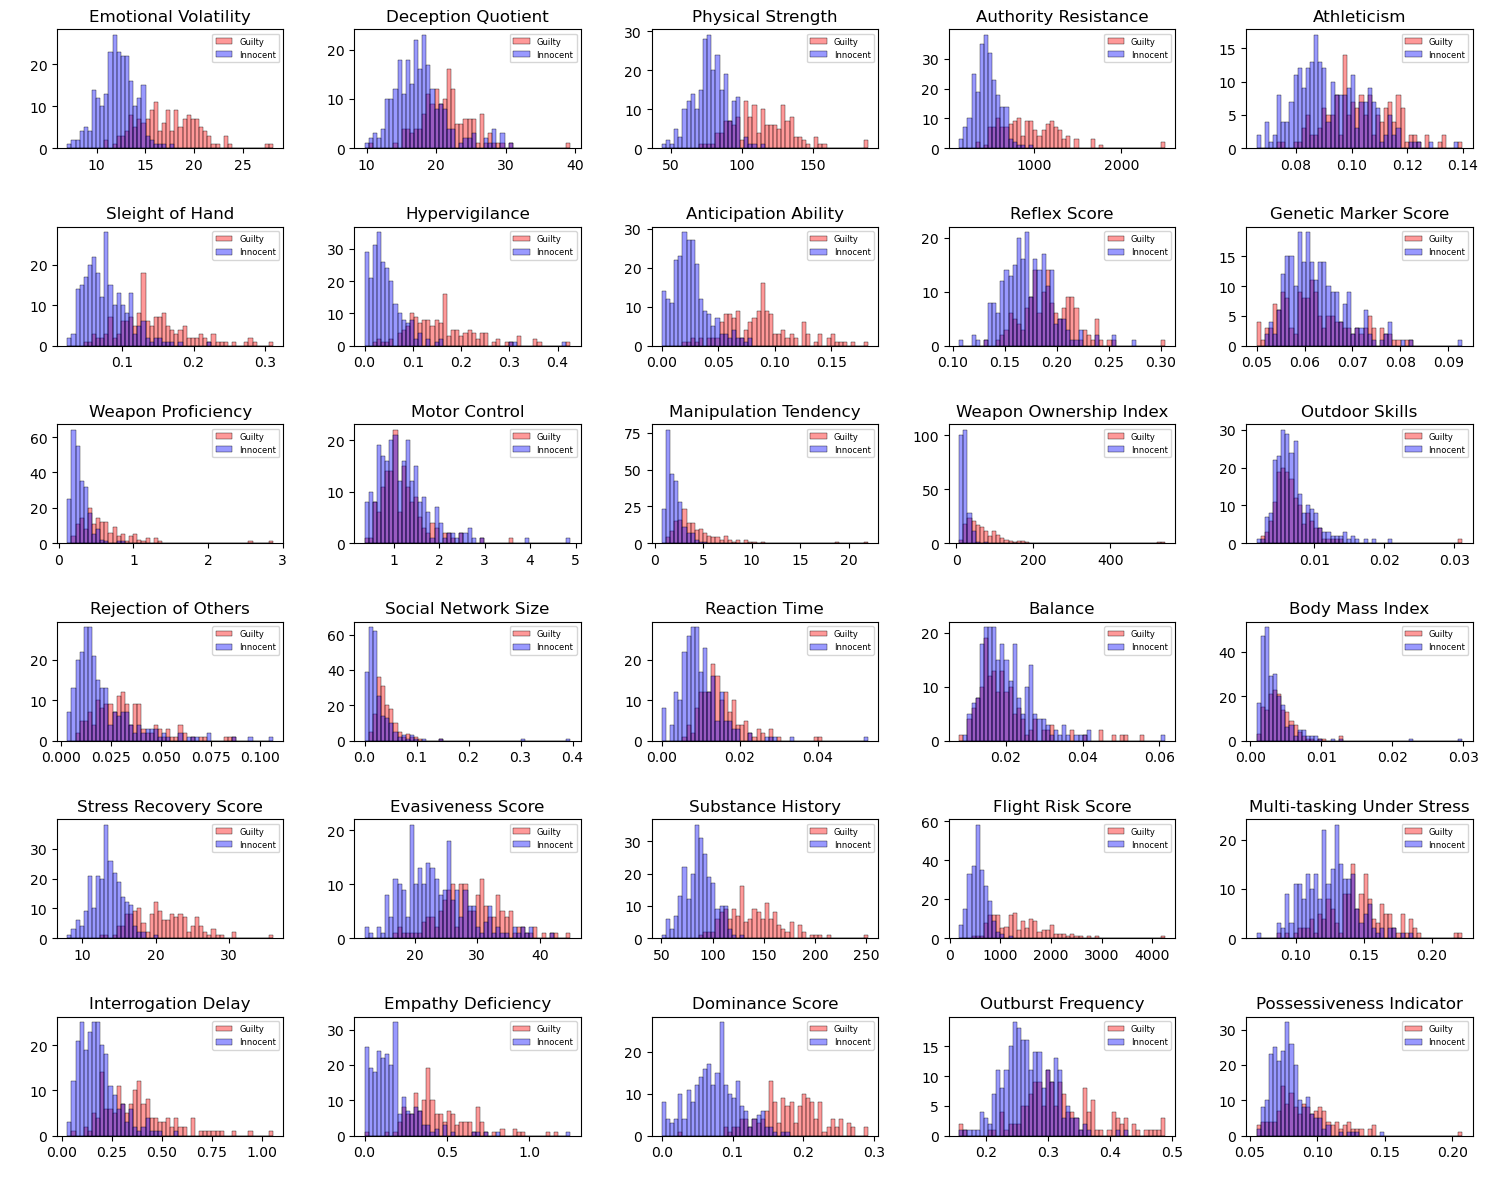

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns


# Select only numeric columns
numeric_cols = df_train.select_dtypes(include='number').columns

# Set up the grid size
num_items = len(numeric_cols)
cols = 5
rows = (num_items + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 2 * rows))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_train,
                 x=col,
                 bins=50,
                 ax=axes[i],
                 kde=False,
                 color='green',
                 alpha=0.4)   
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel(' ')
    axes[i].legend(['Knight'], loc='upper right', fontsize=6)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()




# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 2 * rows))
axes = axes.flatten()  # Flatten 2D array of axes to 1D for easy indexing

# Plot each numeric column
for i, col in enumerate(numeric_cols):
    sns.histplot(data=df_train,
                 x=col,
                 bins=50,
                 ax=axes[i],
                 hue='suspect',
                 palette=['blue', 'red'],
                 kde=False,
                 alpha=0.4)   
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel(' ')
    axes[i].set_ylabel(' ')
    axes[i].legend(['Guilty', 'Innocent'], loc='upper right', fontsize=6)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

Some traits? Pure noise. **BMI, Outdoor Skills, Balance, Motor Control, Genetic Marker Score** — all of them blur together like fogged-up glass on a rainy stakeout. You could stare for hours and still walk away with nothing but a headache.

But some? They cut sharp. **Dominance Score, Anticipation Ability, Substance History** — you see a split, a fracture line. One side red. One side blue. That’s a fingerprint in the dust.

We’re not calling the shots yet. But the separation’s there, clear as a boot print in fresh snow. And we’re always watching.

### Whispers in the Ledger

You want answers? Listen, you don’t beg for ’em — you squeeze them out of the numbers!

Every trait gets dragged into the lineup, standing shoulder to shoulder with guilt like tired suspects in a rain-soaked back alley. 

Some stay silent. Some crack under pressure.

And when the data finally talks... well, you better be ready to listen. Because it doesn’t whisper. It shouts!

In [4]:
# Convert suspect allegiance to a numerical clue (Guilty: 1, Innocent: 0).
df_train['suspect'] = df_train['suspect'].map({'guilty': 1, 'innocent': 0})

# Identify all numerical attribute columns.
numeric_cols = df_train.select_dtypes(include='number').columns

# Calculate correlation of each attribute with suspect allegiance.
correlations = df_train[numeric_cols].corrwith(df_train['suspect'])

# Sort
correlations_sorted = correlations.abs().sort_values(ascending=False)

# Convert sorted correlations into a neat DataFrame report.
corr_df_train = correlations_sorted.to_frame(name='correlation')

# Rename the column
corr_df_train = corr_df_train.reset_index().rename(columns={'index': 'column'})

# Round correlation values
corr_df_train['correlation'] = corr_df_train['correlation'].round(6)

# Display the report
print(corr_df_train.to_string(index=False))

df_train['suspect'] = df_train['suspect'].map({1 : 'guilty', 0 : 'innocent'})

                    column  correlation
                   suspect     1.000000
           Dominance Score     0.793652
      Anticipation Ability     0.790066
         Substance History     0.786797
     Stress Recovery Score     0.777633
         Flight Risk Score     0.739672
         Physical Strength     0.737403
      Emotional Volatility     0.721566
      Authority Resistance     0.700709
            Hypervigilance     0.699662
        Empathy Deficiency     0.648893
           Sleight of Hand     0.631987
       Interrogation Delay     0.598072
        Weapon Proficiency     0.550663
     Manipulation Tendency     0.537800
    Weapon Ownership Index     0.515340
         Evasiveness Score     0.465605
        Deception Quotient     0.446632
        Outburst Frequency     0.445847
Multi-tasking Under Stress     0.445223
             Reaction Time     0.421950
               Athleticism     0.397458
              Reflex Score     0.375103
  Possessiveness Indicator     0.350105


---
<br><br>

## **Points of Suspicion: Scatterplots**

Once you've got your suspects and your signals, you chart the scene. Not with thumbtacks and yarn — with scatterplots. Every dot on that scatterplot? Another poor sap caught in the crossfire. A story waiting to blow up in your face.

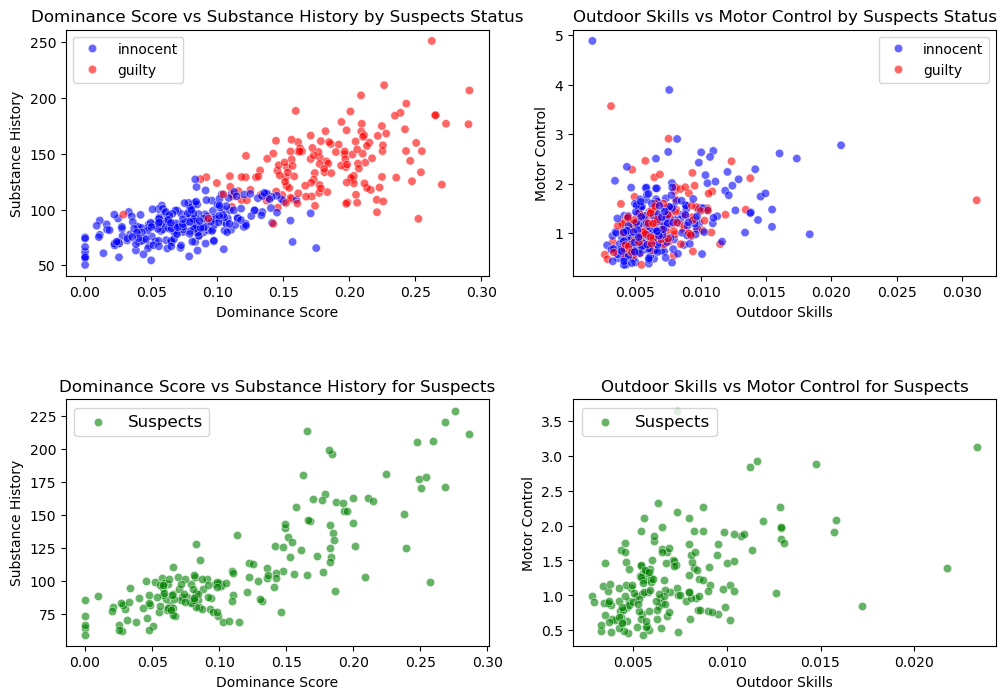

In [5]:

plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2,2,1)
sns.scatterplot(data=df_train, x='Dominance Score', y='Substance History', hue='suspect', alpha=0.6, palette={'innocent': 'blue', 'guilty': 'red'})
plt.legend()
plt.title("Dominance Score vs Substance History by Suspects Status")

plt.subplot(2,2,2)
sns.scatterplot(data=df_train, x='Outdoor Skills', y='Motor Control', hue='suspect', alpha=0.6, palette={'innocent': 'blue', 'guilty': 'red'})
plt.legend()
plt.title("Outdoor Skills vs Motor Control by Suspects Status")


plt.subplot(2,2,3)
sns.scatterplot(data=df_test, x='Dominance Score', y='Substance History', alpha=0.6, color='green')
plt.legend(['Suspects'], loc='upper left', fontsize=12)
plt.title("Dominance Score vs Substance History for Suspects")

plt.subplot(2,2,4)
sns.scatterplot(data=df_test, x='Outdoor Skills', y='Motor Control', alpha=0.6, color='green')
plt.legend(['Suspects'], loc='upper left', fontsize=12)
plt.title("Outdoor Skills vs Motor Control for Suspects")
plt.show()



Some combos light up the board — like **Dominance Score** versus **Substance History**. Clusters form. Guilt pulls away from innocence like oil in water.

Others? A waste of ink. **Outdoor SKills**, **Motor Control** — noise. a smear of dots going nowhere. Static. The kind of mess that gets cases tossed before they hit the desk.

Those last two plots? The testing case files. Green and silent. But if the split still shows...
you're hot on the right trail, kid.

---
<br><br>

## **Cleaning the Evidence**

Before you take anything to court, you’ve got to prep it right. Raw evidence? It’s messy. Inconsistent... You don’t just slap it on the table and hope the jury sees the truth — you clean it, calibrate it, make sure it all stacks up fair.

Two methods. Both get the job done — but in different ways.

### Standardization: Leveling the Street



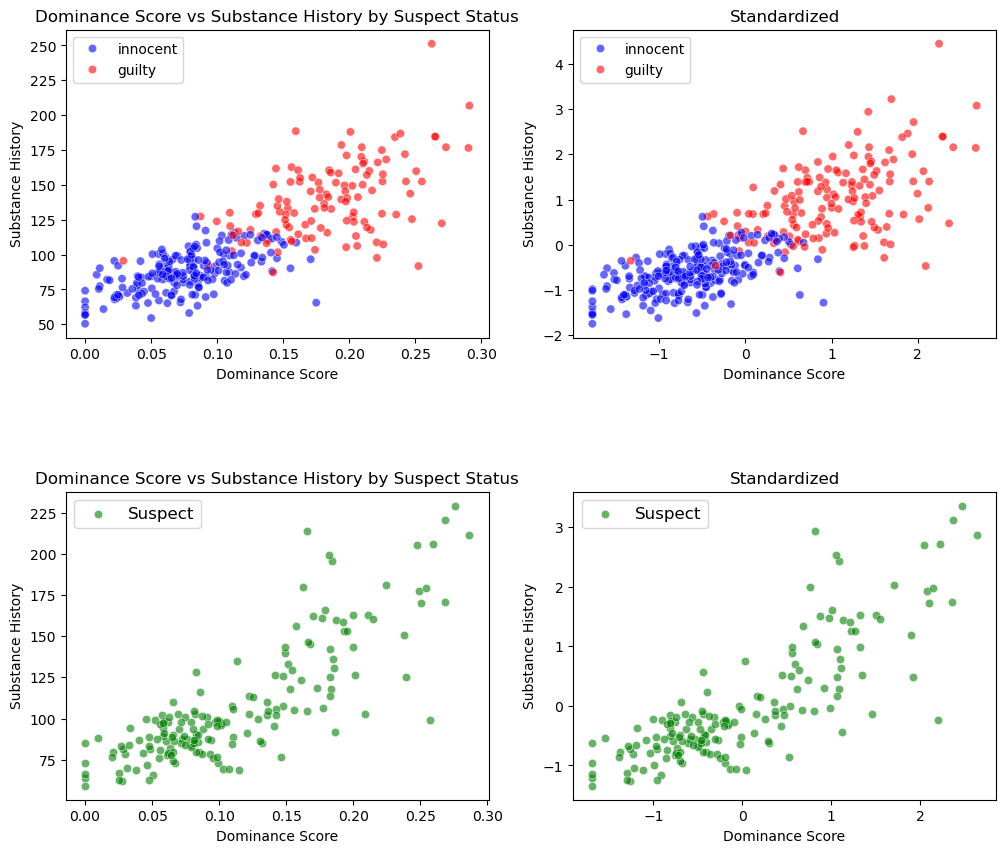

In [6]:
from sklearn.preprocessing import StandardScaler


numeric_cols_train = df_train.select_dtypes(include='number').columns

scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_train[numeric_cols_train])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_train)
X_scaled_df['suspect'] = df_train['suspect'].values

plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 2, 2)
sns.scatterplot(data=X_scaled_df, x='Dominance Score', y='Substance History', hue='suspect', alpha=0.6, palette=['blue', 'red'])
plt.legend()
plt.title("Standardized")


numeric_cols_test = df_test.select_dtypes(include='number').columns
X_scaled = scaler.fit_transform(df_test[numeric_cols_test].fillna(0))
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_test)

plt.subplot(2, 2, 4)
sns.scatterplot(data=X_scaled_df, x='Dominance Score', y='Substance History', alpha=0.6, color='green')
plt.legend(['Suspect'], loc='upper left', fontsize=12)
plt.title("Standardized")



plt.subplot(2, 2, 1)
sns.scatterplot(data=train_df, x='Dominance Score', y='Substance History', hue='suspect', alpha=0.6, palette=['blue', 'red'])
plt.legend()
plt.title("Dominance Score vs Substance History by Suspect Status")

plt.subplot(2, 2, 3)
sns.scatterplot(data=df_test, x='Dominance Score', y='Substance History', alpha=0.6, color='green')
plt.legend(['Suspect'], loc='upper left', fontsize=12)
plt.title("Dominance Score vs Substance History by Suspect Status")
plt.show()

Some traits shout. Others mutter. Doesn’t mean they’re wrong — just uneven.

**Standardization** brings them to the same curb. **Zero mean**. **One standard deviation**. Evens out the noise so no brute overshadows a subtle tell.

After that, the plot calms down — most values land smooth between -2 and 3.
Clean. Balanced. Ready for trial.

### Normalization: Locking It Down


Text(0.5, 1.0, 'Outdoor Skills vs Motor Control by Suspect Status')

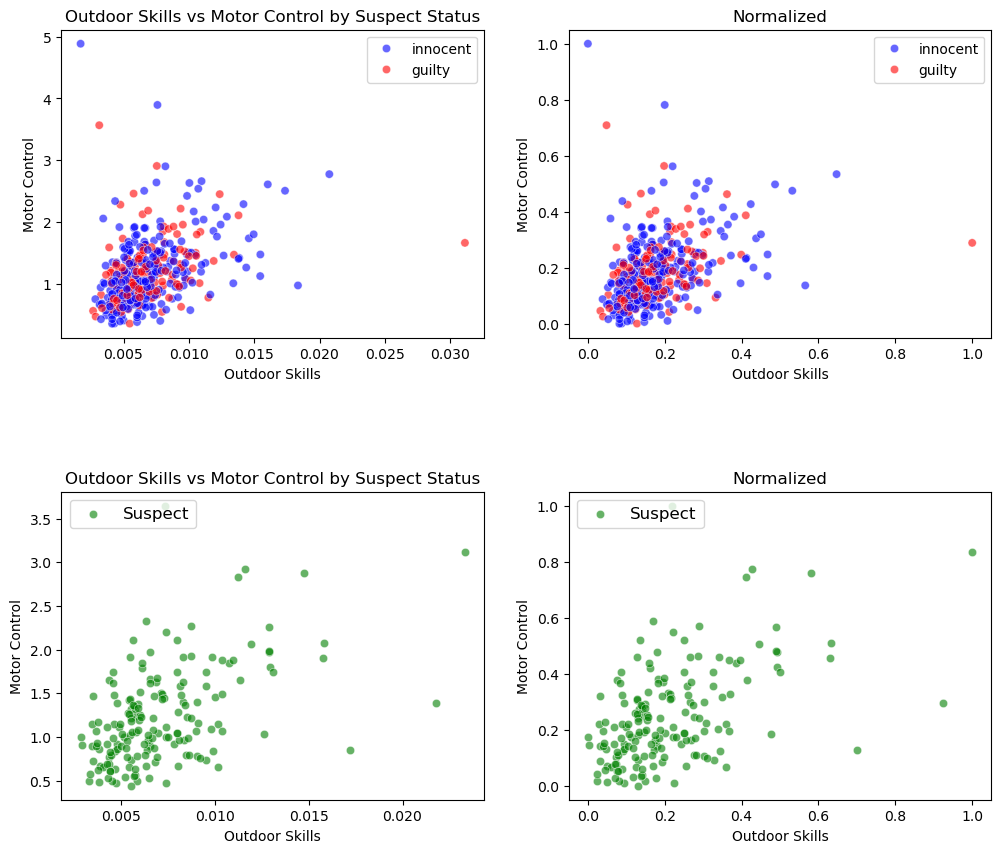

In [7]:
from sklearn.preprocessing import MinMaxScaler


numeric_cols_train = df_train.select_dtypes(include='number').columns

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df_train[numeric_cols_train])
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_train)
X_scaled_df['suspect'] = df_train['suspect'].values

plt.figure(figsize=(12, 10))
plt.subplots_adjust(hspace=0.5)

plt.subplot(2, 2, 2)
sns.scatterplot(data=X_scaled_df, x='Outdoor Skills', y='Motor Control', hue='suspect', alpha=0.6, palette=['blue', 'red'])
plt.legend()
plt.title("Normalized")


numeric_cols_test = df_test.select_dtypes(include='number').columns
X_scaled = scaler.fit_transform(df_test[numeric_cols_test].fillna(0))
X_scaled_df = pd.DataFrame(X_scaled, columns=numeric_cols_test)

plt.subplot(2, 2, 4)
sns.scatterplot(data=X_scaled_df, x='Outdoor Skills', y='Motor Control', alpha=0.6, color='green')
plt.legend(['Suspect'], loc='upper left', fontsize=12)
plt.title("Normalized")



plt.subplot(2, 2, 1)
sns.scatterplot(data=df_train, x='Outdoor Skills', y='Motor Control', hue='suspect', alpha=0.6, palette=['blue', 'red'])
plt.legend()
plt.title("Outdoor Skills vs Motor Control by Suspect Status")

plt.subplot(2, 2, 3)
sns.scatterplot(data=df_test, x='Outdoor Skills', y='Motor Control', alpha=0.6, color='green')
plt.legend(['Suspect'], loc='upper left', fontsize=12)
plt.title("Outdoor Skills vs Motor Control by Suspect Status")

Sometimes, you need tighter control. No gray areas. Just order.

**Normalization** squeezes every clue into a tight frame — 0 to 1. Like tagging evidence and snapping the lock on the box.

It’s not about fairness — it’s about **control**. Some tools demand that kind of order. And when they do, you make sure the data’s sealed and ready for the spotlight.

---
<br><br>

## **Closing the Case... For Now**

We’ve done the legwork. Dug through the shadows, cleaned the evidence, and pinned down the clues that matter.

But the case isn’t closed yet. This was just the stakeout.

Next up, we train our detective agents on the streets they know — the training data. We’ll see what they’re really made of, push their limits, and learn fresh ways to read the signs.

---
